<a href="https://colab.research.google.com/github/Rajesh2015/Logicmojo-AI-ML-Sept25-radash/blob/main/EDA/IMDb%2BMovie%2BAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [5]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)


# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls drive/MyDrive/EDAAssignment/Movie

Movie+Assignment+Data.csv  Movie+Assignment+Data+Dictionary.xlsx


In [8]:
file_path = '/content/drive/MyDrive/EDAAssignment/Movie/Movie+Assignment+Data.csv'


In [9]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

movie_df=pd.read_csv(file_path)
movie_df2=movie_df.copy(deep=True)

- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [10]:
# Check the number of rows and columns in the dataframe
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

- There are 62 columns with around 100 rows in this dataset
- Some columns has null values as listed below with null counts

      1.  ctor_2_facebook_likes  1    null     float64
      2.  actor_3_facebook_likes 2    null     float64
      2.  genre_2                3   null     object
      3.  genre_3                26  null     object
      4.  MetaCritic             5   null     float64



In [11]:
# Check the column-wise info of the dataframe

all_cols=movie_df.columns
res={}

for col in all_cols:
 if movie_df[col].dtype == 'object':
    prevcount=res.get('object_type',0)
    res['object_type']=prevcount+1
 elif movie_df[col].dtype =='int64':
    prevcount=res.get('int64',0)
    res['int64']=prevcount+1
 else:
    prevcount=res.get('float64',0)
    res['float64']=prevcount+1

pd.DataFrame(res,index=["count_types"]).T


,count_types
object_type,9
int64,32
float64,21


There are total 9 objecttypes 32 int types and 21 float types

In [12]:
for col in all_cols:
  if movie_df[col].dtype not in ['int64', 'float64']:
      print(f"{col} is Object")


Title is Object
actor_1_name is Object
actor_2_name is Object
actor_3_name is Object
genre_1 is Object
genre_2 is Object
genre_3 is Object
content_rating is Object
Country is Object


All these columns should be String type instaed these are Object type

In [13]:
# Check the summary for the numeric columns

numeric_cols=list(filter(lambda x:movie_df[x].dtype in ['int64', 'float64'],all_cols))
print(len(numeric_cols))
movie_df[numeric_cols[0:15]].describe()


53


,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05
count,100.00,100.00,100.00,100.00,99.00,98.00,100.00,95.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,2012.82,78384000.00,146867867.24,13407.27,7377.30,3002.15,7.88,78.25,126.42,73212.16,92404.17,125762.23,76715.28,27841.45,10171.75
std,1.92,74452947.27,145400370.13,10649.04,13471.57,6940.30,0.25,9.12,19.05,82669.59,75666.92,62162.75,32586.36,12883.91,5480.91
min,2010.00,3000000.00,223838.00,39.00,12.00,0.00,7.50,62.00,91.00,6420.00,7321.00,11668.00,8558.00,3370.00,1162.00
25%,2011.00,15750000.00,41997523.75,1000.00,580.00,319.75,7.70,72.00,114.75,30587.00,47098.25,83207.50,54934.50,17834.50,6026.00
50%,2013.00,42250000.00,107026591.00,13000.00,1000.00,626.50,7.80,78.00,124.00,54900.50,71376.00,117405.50,76862.00,27072.00,9123.00
75%,2014.00,150000000.00,210754845.50,20000.00,11000.00,1000.00,8.10,83.50,136.25,80639.00,115240.25,166742.50,100789.00,37561.75,13008.50
max,2016.00,260000000.00,936662225.00,35000.00,96000.00,46000.00,8.80,100.00,180.00,584839.00,485218.00,304457.00,162604.00,67579.00,27957.00


- Mean budget of the movies across dataset is 78384000 while max and 75 % of data is at 260000000 and 150000000 respectievly .
- Mean runtime of movies are 126 of the datatset while the max is at 180 and 75% of data is at 136. This might give some indication of outliers at max value.
- Mean imdb rating is 8 of the dataset
- Highest Title year is at 2016 and min is at 2010.So dataset have the data from 2010-2016
-  We see actiors facebook likes obesrvation as below
      *   Mean Actor 1  facebok like at 13407 ,actor2  facebook likes 7377 and actor 3 facebook likes 3002.So acriss the dataset actor1 likes>actor2 likes>actor3 likes and same trends followe 50% and 75% dataset as well.This did chnage with maximum value though where actor2 has more facebook likes then actor3 and actor3 has more facebook likes then actor1.So this
      shows the inconsistent role to actors and some actrors at lead actor 2 are having huge fan base .
-  The number of votes steadily declines from CVotes10 (mean = 73K) to CVotes06 (mean = 27K), showing that higher ratings receive more votes overall.
This indicates most users tend to rate movies positively.






In [14]:
movie_df[numeric_cols[14:30]].describe()

,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,10171.75,4330.11,2477.07,1711.57,4084.35,271446.18,64468.86,1769.05,1318.95,435.66,165863.77,128473.14,35739.71,124561.10,103437.92,19371.54
std,5480.91,2713.61,1768.17,1318.63,3489.78,167658.02,39117.95,1324.52,1040.96,366.50,103522.93,83188.73,23092.04,72089.25,61116.37,11324.68
min,1162.00,456.00,227.00,158.00,293.00,22441.00,9552.00,121.00,95.00,20.00,15959.00,10150.00,4370.00,12174.00,9280.00,2682.00
25%,6026.00,2293.50,1172.75,761.75,1532.75,171936.25,35188.75,756.25,579.00,159.75,109797.75,77537.75,17637.75,78866.25,64930.25,12030.50
50%,9123.00,3801.00,1950.00,1320.00,2933.00,238199.50,58539.50,1420.00,998.00,325.50,139321.50,111362.00,32639.50,111317.50,94010.50,17763.00
75%,13008.50,5571.00,3309.50,2334.50,5296.00,338326.50,82355.00,2478.75,1790.75,660.00,212788.25,160442.00,47301.00,158760.75,135668.75,24859.50
max,27957.00,12286.00,7868.00,5751.00,15768.00,1044318.00,239796.00,5735.00,4596.00,1910.00,655187.00,512411.00,136770.00,472680.00,392845.00,73555.00


In [15]:
movie_df[numeric_cols[30:47]].describe()

,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,24170.16,19653.26,4093.53,624.37,54096.74,188245.68,7.85,7.91,8.21,8.17,8.22,8.01,8.01,7.98,7.73,7.72,7.78
std,12841.70,10669.04,2187.96,133.24,32115.29,106902.26,0.26,0.30,0.31,0.36,0.38,0.27,0.28,0.32,0.25,0.26,0.28
min,1899.00,1496.00,355.00,198.00,3678.00,19009.00,7.40,7.30,7.50,7.40,7.20,7.60,7.60,7.30,7.30,7.20,7.20
25%,15288.75,12154.75,2492.75,545.00,33328.75,121863.50,7.67,7.70,8.00,7.90,7.97,7.80,7.80,7.70,7.60,7.50,7.60
50%,21869.50,17782.00,3771.50,639.50,48560.00,169132.00,7.80,7.90,8.20,8.15,8.30,8.00,8.00,8.00,7.70,7.70,7.80
75%,30043.00,24780.00,5342.25,727.00,70167.00,239628.25,8.00,8.10,8.40,8.40,8.50,8.12,8.10,8.20,7.90,7.90,8.00
max,79634.00,65508.00,12795.00,885.00,212524.00,707266.00,8.80,8.70,9.10,9.10,9.00,9.00,9.00,8.80,8.70,8.70,8.50


In [16]:
movie_df[numeric_cols[48:len(numeric_cols)]].describe()

,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.00,100.00,100.00,100.00,100.00
mean,7.62,7.77,7.27,7.96,7.79
std,0.21,0.30,0.36,0.23,0.26
min,7.10,7.00,6.40,7.50,7.30
25%,7.47,7.50,7.10,7.80,7.60
50%,7.60,7.80,7.30,7.95,7.75
75%,7.80,7.93,7.50,8.10,7.93
max,8.10,8.50,8.20,8.70,8.80


- It can be seen that people votes when they need to give high ratting  or extremly low rating like 1 or avg rating like 5 .
- We can see most the review given  are male compared to female
-  The datasets has less vote from U18 (mean 1769) .That means U18 are less likely to watch the movies or limited movie to watch
- U18 M has more votes then U18F Mean:(1319(M) vs 436 (F))
- Dataset has more people from age group from 18-44  as we go higher above 44 age we donot see much people who votecomared to 18-44
- There are less female in the dataset who has voted or rrevieed or may be less female waych movies
- There are more people in dataset who votes from outside US compared to people inside US.
- Avg rating for all age group is 8 and max is 9 so there might be some outliers.

## Utils

In [17]:
def convert_to_million(df:pd.DataFrame,column_to_convert:str,new_name:str):
  df[new_name]=df[column_to_convert] / 1_000_000


In [18]:
def draw_scatter(data,x,y,title,xlabel,ylabel,palette='pastel'):
  sns.scatterplot(data=data,x=x,y=y,palette=palette)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(True)
  return plt

In [19]:
def impute_missing_with_mean(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for col in columns:
        if col in df.columns:
            missing_count = df[col].isnull().sum()
            print(f"{col}: {missing_count} missing values")
            if missing_count > 0:
                df[col].fillna(df[col].mean(), inplace=True)
                print(f"Filled {missing_count} missing values in '{col}' with mean = {df[col].mean():.2f}")
    return df

In [20]:
def plot_histogram(df,x,title,palette='pastel'):
  sns.histplot(df,x=x,kde=True)
  plt.title(title)
  plt.grid(True)
  return plt

In [21]:
def plot_barplot(df, x, y, title, xlabel, ylabel, palette='pastel'):
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=df, x=x, y=y, palette=palette)

    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points'
        )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.yticks(rotation=45)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.tight_layout()
    return plt

In [22]:
def plot_side_by_side_heatmaps(
    df_left,
    df_right,
    title_left,
    title_right,
    xlabel_left='',
    xlabel_right='',
    ylabel_left='',
    ylabel_right='',
    cmap_left='Pastel2',
    cmap_right='Pastel2',
    fmt='.0f',
    figsize=(14, 6),
    suptitle=None
):
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    sns.heatmap(df_left, annot=True, fmt=fmt, cmap=cmap_left, ax=ax[0])
    ax[0].set_title(title_left)
    ax[0].set_xlabel(xlabel_left)
    ax[0].set_ylabel(ylabel_left)

    sns.heatmap(df_right, annot=True, fmt=fmt, cmap=cmap_right, ax=ax[1])
    ax[1].set_title(title_right)
    ax[1].set_xlabel(xlabel_right)
    ax[1].set_ylabel(ylabel_right)

    if suptitle:
        fig.suptitle(suptitle, fontsize=14, fontweight='bold', y=1.05)

    plt.tight_layout()
    return plt

In [74]:
def plot_boxplot_with_medians(df,x,y,title,xlabel,ylabel,rx,ry,right_title,x_right_label,y_right_label,figsize=(10, 5),palette='Pastel2'):

  fig, ax = plt.subplots(1, 2, figsize=figsize)

  sns.boxplot(data=movie_df2, x=x, y=y, palette=palette,ax=ax[0])
  for i, group in enumerate(movie_df2[x].unique()):
    median_val = movie_df2[movie_df2[x] == group][y].median()
    ax[0].text(i, median_val, f'{median_val:.1f}',
            ha='center', va='bottom', fontsize=10, color='black', weight='bold')
  ax[0].set_title(title)
  ax[0].set_xlabel(xlabel)
  ax[0].set_ylabel(ylabel)

  sns.boxplot(data=movie_df2, x=rx, y=ry, palette=palette,ax=ax[1])
  for i, group in enumerate(movie_df2[rx].unique()):
    median_val = movie_df2[movie_df2[rx] == group][ry].median()
    ax[1].text(i, median_val, f'{median_val:.1f}',
            ha='center', va='bottom', fontsize=10, color='black', weight='bold')
  ax[1].set_title(right_title)
  ax[1].set_xlabel(x_right_label)
  ax[1].set_ylabel(y_right_label)
  return plt


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data.

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [23]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
convert_to_million(movie_df2,'Gross','Gross (Million $)')
convert_to_million(movie_df2,'budget','budget (Million $)')

# movie_df2.drop(['Gross','budget'],inplace=True,axis=1)
movie_df2.head(5)



,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Gross (Million $),budget (Million $)
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.00,NaN,...,7.60,7.60,7.50,7.10,8.30,8.10,PG-13,USA,151.10,30.00
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.00,27000.00,...,7.80,7.80,8.10,7.60,8.00,8.00,PG,USA,341.27,150.00
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.00,9800.00,...,8.00,7.90,8.40,7.10,8.10,8.00,PG-13,Australia,51.74,12.00
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.00,NaN,...,7.60,7.60,7.70,7.30,8.00,7.90,PG-13,USA,100.55,47.00
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.00,3300.00,...,7.60,7.60,7.60,7.10,7.90,7.80,R,USA,47.70,9.00


-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [24]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

million=1_000_000
movie_df2['profit'] = movie_df2['Gross (Million $)'] * million - movie_df2['budget (Million $)'] * million
convert_to_million(movie_df2,'profit','profit(Million)')


In [25]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'
sorted_movie_df=movie_df2.sort_values(by='profit(Million)',ascending=False)



In [26]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)

top10=sorted_movie_df.head(10).reset_index()
top10

,index,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Gross (Million $),budget (Million $),profit,profit(Million)
0,97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.00,...,8.20,7.70,8.20,7.90,PG-13,USA,936.66,245.00,691662225.00,691.66
1,11,The Avengers,2012,220000000,623279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.00,...,8.10,7.40,8.30,7.90,PG-13,USA,623.28,220.00,403279547.00,403.28
2,47,Deadpool,2016,58000000,363024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.00,...,7.90,7.30,8.10,7.90,R,USA,363.02,58.00,305024263.00,305.02
3,32,The Hunger Games: Catching Fire,2013,130000000,424645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.00,...,7.90,6.70,7.70,7.40,PG-13,USA,424.65,130.00,294645577.00,294.65
4,12,Toy Story 3,2010,200000000,414984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.00,...,8.10,8.10,8.50,8.30,G,USA,414.98,200.00,214984497.00,214.98
5,8,The Dark Knight Rises,2012,250000000,448130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.00,...,7.90,7.80,8.40,8.40,PG-13,USA,448.13,250.00,198130642.00,198.13
6,45,The Lego Movie,2014,60000000,257756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.00,...,7.40,7.20,8.00,7.60,PG,Australia,257.76,60.00,197756197.00,197.76
7,1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.00,...,8.10,7.60,8.00,8.00,PG,USA,341.27,150.00,191268248.00,191.27
8,41,Despicable Me,2010,69000000,251501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.00,...,7.90,7.00,7.60,7.60,PG,USA,251.50,69.00,182501645.00,182.50
9,18,Inside Out,2015,175000000,356454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.00,...,7.90,7.60,8.20,8.10,PG,USA,356.45,175.00,181454367.00,181.45


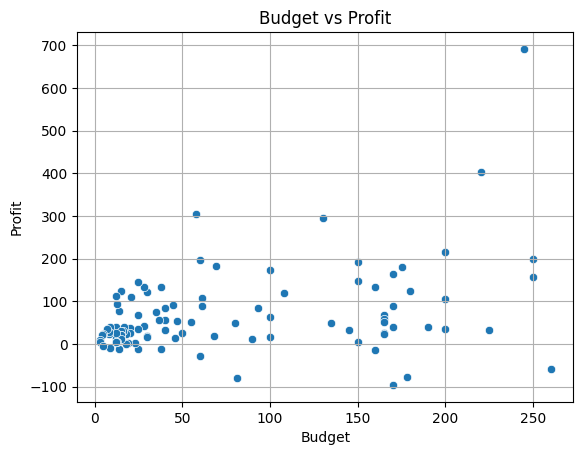

In [27]:
#Plot profit vs budget
plt=draw_scatter(movie_df2,movie_df2['budget (Million $)'],movie_df2['profit(Million)'],"Budget vs Profit","Budget","Profit")
plt.show()

- We can see movie with budget of 0-50 million has orofit ranging from nagative to 150 million
- There are movies with nagative profit as well
- There is corealtion between budget and profit as we do not see a definite trends .


The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [28]:
#Find the movies with negative profit
neg_profit=movie_df2[movie_df2['profit(Million)']<0]

neg_profit

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Gross (Million $),budget (Million $),profit,profit(Million)
7,Tangled,2010,260000000,200807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.00,284.00,...,7.90,6.90,7.90,7.70,PG,USA,200.81,260.00,-59192738.00,-59.19
17,Edge of Tomorrow,2014,178000000,100189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.00,509.00,...,7.80,7.50,8.00,7.80,PG-13,USA,100.19,178.00,-77810499.00,-77.81
22,Hugo,2011,170000000,73820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.00,1000.00,...,7.60,7.40,7.70,7.50,PG,USA,73.82,170.00,-96179906.00,-96.18
28,X-Men: First Class,2011,160000000,146405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.00,1000.00,...,7.70,7.30,7.80,7.70,PG-13,USA,146.41,160.00,-13594629.00,-13.59
39,The Little Prince,2015,81200000,1339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.00,6000.00,...,7.90,6.60,7.70,7.70,PG,France,1.34,81.20,-79860848.00,-79.86
46,Scott Pilgrim vs. the World,2010,60000000,31494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.00,719.00,...,7.00,6.60,7.80,7.40,PG-13,USA,31.49,60.00,-28505730.00,-28.51
56,Rush,2013,38000000,26903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.00,471.00,...,7.80,7.10,7.90,8.10,R,UK,26.90,38.00,-11096291.00,-11.10
66,Warrior,2011,25000000,13651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.00,581.00,...,7.50,7.10,8.20,8.10,PG-13,USA,13.65,25.00,-11348338.00,-11.35
82,Flipped,2010,14000000,1752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.00,767.00,...,7.60,6.40,7.50,7.70,PG,USA,1.75,14.00,-12247786.00,-12.25
89,Amour,2012,8900000,225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.00,319.00,...,8.10,7.20,7.90,7.80,PG-13,France,0.23,8.90,-8674623.00,-8.67


-  Movie like Tangled has gross of 592 million where as the dataset shows the doemstic gross which is 200.X-Men: First Class gross is also around $352.6 where as the dataset shows the doemestic gross 146.
- If we try to search for movie which does not have nagative profit those also given with domestic gross for ex:Star Wars: Episode VII - The Force Awakens	 and The Avengers and others as well.

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience.

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [29]:
# Change the scale of MetaCritic
movie_df2['MetaCritic_10']=movie_df2['MetaCritic']/10

movie_df2.head(5)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes1000,VotesUS,VotesnUS,content_rating,Country,Gross (Million $),budget (Million $),profit,profit(Million),MetaCritic_10
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.00,NaN,...,7.10,8.30,8.10,PG-13,USA,151.10,30.00,121101803.00,121.10,9.30
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.00,27000.00,...,7.60,8.00,8.00,PG,USA,341.27,150.00,191268248.00,191.27,7.80
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.00,9800.00,...,7.10,8.10,8.00,PG-13,Australia,51.74,12.00,39738905.00,39.74,6.90
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.00,NaN,...,7.30,8.00,7.90,PG-13,USA,100.55,47.00,53546139.00,53.55,8.10
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.00,3300.00,...,7.10,7.90,7.80,R,USA,47.70,9.00,38695371.00,38.70,9.60


In [30]:
# Find the average ratings
movie_df2['Avg_rating'] = (movie_df2['IMDb_rating'] + movie_df2['MetaCritic_10']) / 2


In [31]:
#Sort in descending order of average rating

movie_df2.sort_values(by='Avg_rating',ascending=False).reset_index(drop=True).head(5)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,VotesUS,VotesnUS,content_rating,Country,Gross (Million $),budget (Million $),profit,profit(Million),MetaCritic_10,Avg_rating
0,Boyhood,2014,4000000,25359200,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193.00,127.00,...,8.00,7.90,R,USA,25.36,4.00,21359200.00,21.36,10.00,8.95
1,12 Years a Slave,2013,20000000,56667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.00,500.00,...,8.30,8.00,R,USA,56.67,20.00,36667870.00,36.67,9.60,8.85
2,Inside Out,2015,175000000,356454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.00,384.00,...,8.20,8.10,PG,USA,356.45,175.00,181454367.00,181.45,9.40,8.80
3,Toy Story 3,2010,200000000,414984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.00,721.00,...,8.50,8.30,G,USA,414.98,200.00,214984497.00,214.98,9.20,8.75
4,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.00,NaN,...,8.30,8.10,PG-13,USA,151.10,30.00,121101803.00,121.10,9.30,8.75


In [32]:
# Retain only the movies in which the absolute difference(using abs() function) between the IMDb_rating and Metacritic columns is less than 0.5.
movie_df2['metacritic_rating']=abs(movie_df2['IMDb_rating']- movie_df2['MetaCritic_10'])

In [33]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8

# only shows above 8
UniversalAcclaim = movie_df2[(movie_df2['Avg_rating'] > 8) & (movie_df2['metacritic_rating']<0.5)]

UniversalAcclaim.head(5)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,VotesnUS,content_rating,Country,Gross (Million $),budget (Million $),profit,profit(Million),MetaCritic_10,Avg_rating,metacritic_rating
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.00,NaN,...,7.90,PG-13,USA,100.55,47.00,53546139.00,53.55,8.10,8.05,0.10
35,Django Unchained,2012,100000000,162804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000.00,265.00,...,8.40,R,USA,162.80,100.00,62804648.00,62.80,8.10,8.25,0.30
93,Dallas Buyers Club,2013,5000000,27296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000.00,896.00,...,7.90,R,USA,27.30,5.00,22296514.00,22.30,8.40,8.20,0.40
95,Whiplash,2014,3300000,13092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.00,535.00,...,8.40,R,USA,13.09,3.30,9792000.00,9.79,8.80,8.65,0.30
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,Doug Walker,Rob Walker,0,131,12.00,0.00,...,7.90,PG-13,USA,936.66,245.00,691662225.00,691.66,8.10,8.10,0.00


Star war movies both avg_rating and metacritic rating is same 8.1 so abs differnce is 0

**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [34]:
# Write your code here
populrity_columns=['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']
# there are some null values so imputeb with mean
impute_missing_with_mean(movie_df2,populrity_columns)
movie_df2['combined_popularity']=movie_df2['actor_1_facebook_likes']+movie_df2['actor_2_facebook_likes']+movie_df2['actor_3_facebook_likes']
movie_df2.sort_values(by='combined_popularity',ascending=False).reset_index(drop=True).head(5)

actor_1_facebook_likes: 0 missing values
actor_2_facebook_likes: 1 missing values
Filled 1 missing values in 'actor_2_facebook_likes' with mean = 7377.30
actor_3_facebook_likes: 2 missing values
Filled 2 missing values in 'actor_3_facebook_likes' with mean = 3002.15


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,content_rating,Country,Gross (Million $),budget (Million $),profit,profit(Million),MetaCritic_10,Avg_rating,metacritic_rating,combined_popularity
0,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.00,9800.00,...,PG-13,Australia,51.74,12.00,39738905.00,39.74,6.90,7.50,1.20,138800.00
1,Inception,2010,160000000,292568851,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.00,23000.00,...,PG-13,USA,292.57,160.00,132568851.00,132.57,7.40,8.10,1.40,79000.00
2,X-Men: Days of Future Past,2014,200000000,233914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.00,20000.00,...,PG-13,USA,233.91,200.00,33914986.00,33.91,7.40,7.70,0.60,76000.00
3,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.00,3300.00,...,R,USA,47.70,9.00,38695371.00,38.70,9.60,8.75,1.70,74818.00
4,The Dark Knight Rises,2012,250000000,448130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.00,23000.00,...,PG-13,USA,448.13,250.00,198130642.00,198.13,7.80,8.10,0.60,73000.00


- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [35]:
# Your answer here (optional)
def is_pop_trio(data) -> bool:
    c1 = data['actor_1_facebook_likes']
    c2 = data['actor_2_facebook_likes']
    c3 = data['actor_3_facebook_likes']

    if (
        (c1 >= c2 * 0.5 and c1 >= c3 * 0.5) and
        (c2 >= c1 * 0.5 and c2 >= c3 * 0.5) and
        (c3 >= c1 * 0.5 and c3 >= c2 * 0.5)
    ):
        return True
    else:
        return False

movie_df2['is_popular_trio'] = movie_df2.apply(is_pop_trio, axis=1)
print("No. of trios that satisfy the above condition",movie_df2['is_popular_trio'].count()," ")
movie_df2[movie_df2['is_popular_trio']].head(5)



No. of trios that satisfy the above condition 100  


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Country,Gross (Million $),budget (Million $),profit,profit(Million),MetaCritic_10,Avg_rating,metacritic_rating,combined_popularity,is_popular_trio
8,The Dark Knight Rises,2012,250000000,448130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.00,23000.00,...,USA,448.13,250.00,198130642.00,198.13,7.80,8.10,0.60,73000.00,True
9,Captain America: Civil War,2016,250000000,407197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.00,11000.00,...,USA,407.20,250.00,157197282.00,157.20,7.50,7.70,0.40,51000.00,True
11,The Avengers,2012,220000000,623279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.00,19000.00,...,USA,623.28,220.00,403279547.00,403.28,6.90,7.50,1.20,66000.00,True
14,X-Men: Days of Future Past,2014,200000000,233914986,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.00,20000.00,...,USA,233.91,200.00,33914986.00,33.91,7.40,7.70,0.60,76000.00,True
23,Big Hero 6,2014,165000000,222487711,Damon Wayans Jr.,Daniel Henney,Abraham Benrubi,756,719.00,562.00,...,USA,222.49,165.00,57487711.00,57.49,7.40,7.60,0.40,2037.00,True


- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

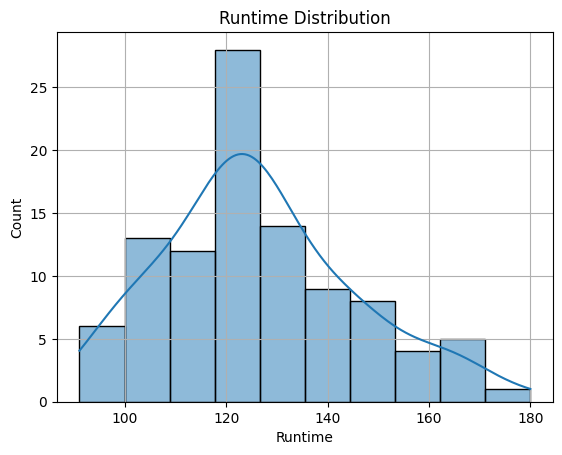

In [36]:
# Runtime histogram/density plot
plt=plot_histogram(movie_df2,x="Runtime",title="Runtime Distribution")
plt.show()

- Most of the movies falls on 120 second where as max is at 180

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [37]:
# Write your code here
print("Content Ratings Unique",movie_df2.content_rating.unique()," ")
PopularR=movie_df2[movie_df2['content_rating']=='R'].sort_values(by='CVotesU18',ascending=False).reset_index(drop=True).head(10)
PopularR[['Title','content_rating','CVotesU18','Avg_rating']].head(5)



Content Ratings Unique ['PG-13' 'PG' 'R' 'G']  


,Title,content_rating,CVotesU18,Avg_rating
0,Deadpool,R,4598,7.25
1,The Wolf of Wall Street,R,3622,7.85
2,Django Unchained,R,3250,8.25
3,Mad Max: Fury Road,R,3159,8.55
4,Whiplash,R,2878,8.65


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

Most votes to dedapool by under 18

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns.
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively.
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [38]:
# Create the dataframe df_by_genre
cvotes_votes_cols = [col for col in movie_df2.columns if 'CVotes' in col or 'Votes' in col]
cols_to_extract = ['genre_1', 'genre_2', 'genre_3'] + cvotes_votes_cols
df_by_genre = movie_df2[cols_to_extract]


In [39]:
# Create a column cnt and initialize it to 1

df_by_genre['cnt']=1

In [40]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby('genre_1').sum(numeric_only=True)
df_by_g2 = df_by_genre.groupby('genre_2').sum(numeric_only=True)
df_by_g3 = df_by_genre.groupby('genre_3').sum(numeric_only=True)

In [41]:
# Add the grouped data frames and store it in a new data frame

df_add=df_by_g1.add(df_by_g2,fill_value=0).add(df_by_g3,fill_value=0)

In [42]:
# Extract genres with atleast 10 occurences

genre_top10 = df_add[df_add['cnt'] >= 10]
genre_top10.head(5)

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,3166467.00,3547429.00,4677755.00,2922126.00,1075354.00,393484.00,166970.00,95004.00,65573.00,171247.00,...,240.00,239.50,241.80,237.00,236.40,240.40,226.20,247.60,240.60,31.00
Adventure,3594659.00,4014192.00,5262328.00,3281981.00,1212075.00,438970.00,183070.00,103318.00,69737.00,173858.00,...,294.60,293.70,299.20,291.70,290.40,298.00,280.60,303.50,296.20,38.00
Animation,681562.00,798227.00,1153214.00,722782.00,251076.00,83069.00,30718.00,15733.00,10026.00,25193.00,...,85.40,84.90,87.80,84.50,84.10,86.70,80.00,87.60,86.10,11.00
Biography,852003.00,1401608.00,2231078.00,1332980.00,425595.00,138648.00,53718.00,29510.00,20613.00,51297.00,...,139.10,138.90,139.80,138.50,137.90,141.70,130.10,142.70,139.90,18.00
Comedy,1383616.00,1774987.00,2506851.00,1591069.00,600287.00,226852.00,97469.00,56218.00,39391.00,88367.00,...,177.40,177.40,178.30,175.00,174.70,177.10,165.40,182.60,178.90,23.00


In [43]:
# Take the mean for every column by dividing with cnt

cols = [c for c in genre_top10.columns if c != 'cnt']
genre_top10[cols] = genre_top10[cols].div(genre_top10['cnt'], axis=0)

In [44]:
# Rounding off the columns of Votes to two decimals
for col in genre_top10.columns:
  if 'Votes' in col:
    genre_top10[col].round(2)
  elif 'CVotes' in col:
    genre_top10[col].astype('int')




In [45]:
# Converting CVotes to int type
genre_top10=genre_top10.reset_index(names='genre')

genre_top10.head()

,genre,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
0,Action,102144.10,114433.19,150895.32,94262.13,34688.84,12693.03,5386.13,3064.65,2115.26,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.00
1,Adventure,94596.29,105636.63,138482.32,86367.92,31896.71,11551.84,4817.63,2718.89,1835.18,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.00
2,Animation,61960.18,72566.09,104837.64,65707.45,22825.09,7551.73,2792.55,1430.27,911.45,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.00
3,Biography,47333.50,77867.11,123948.78,74054.44,23644.17,7702.67,2984.33,1639.44,1145.17,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.00
4,Comedy,60157.22,77173.35,108993.52,69176.91,26099.43,9863.13,4237.78,2444.26,1712.65,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.00


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

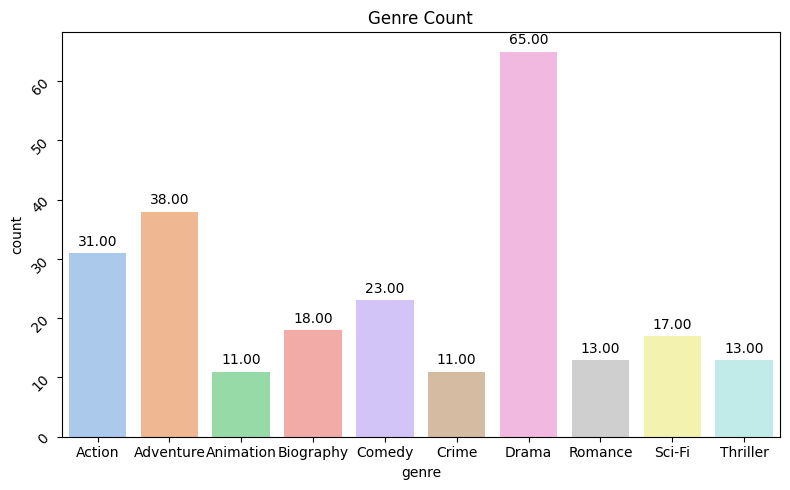

In [46]:
# Countplot for genres
plot_barplot(genre_top10,x='genre',y='cnt',title='Genre Count',xlabel='genre',ylabel='count')


**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

- Drama has highest number of movies in dataset
- Animation  and crime is lowest (11)
- Romance and Thriller has around 13 each.

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe.

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group.

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group.

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

In [47]:
genre_top10.columns

Index(['genre', 'CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06',
       'CVotes05', 'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01',
       'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F',
       'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'Votes1000', 'VotesUS', 'VotesnUS', 'cnt'],
      dtype='object')

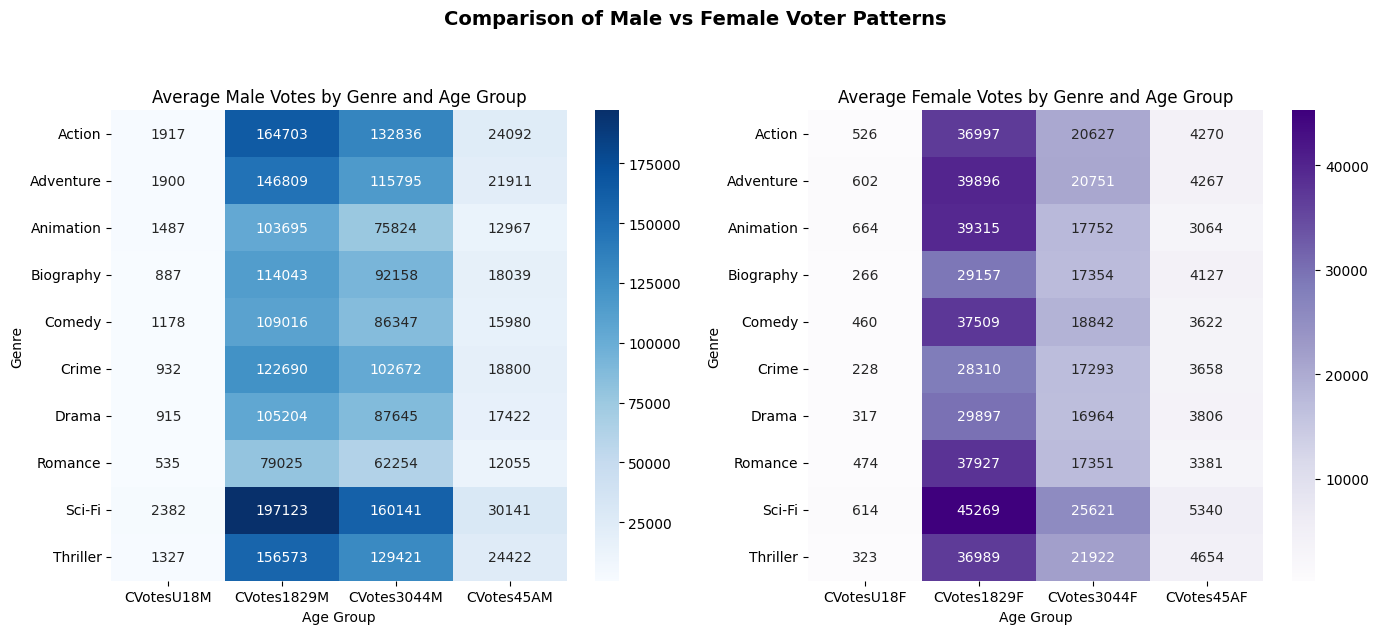

In [48]:
# 1st set of heat maps for CVotes-related columns
male_vote_cols = ['CVotesU18M', 'CVotes1829M', 'CVotes3044M', 'CVotes45AM']
female_vote_cols = ['CVotesU18F', 'CVotes1829F', 'CVotes3044F', 'CVotes45AF']

genre_votes_male = (
    genre_top10.groupby('genre')[male_vote_cols]
    .mean()
    .sort_index()
)

genre_votes_female = (
    genre_top10.groupby('genre')[female_vote_cols]
    .mean()
    .sort_index()
)

plt=plot_side_by_side_heatmaps(
    genre_votes_male,
    genre_votes_female,
    title_left='Average Male Votes by Genre and Age Group',
    title_right='Average Female Votes by Genre and Age Group',
    xlabel_left='Age Group',
    xlabel_right='Age Group',
    ylabel_left='Genre',
    ylabel_right='Genre',
    cmap_left='Blues',
    cmap_right='Purples',
    suptitle='Comparison of Male vs Female Voter Patterns'
)
plt.show()

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:
- Inference 2:
- Inference 3:

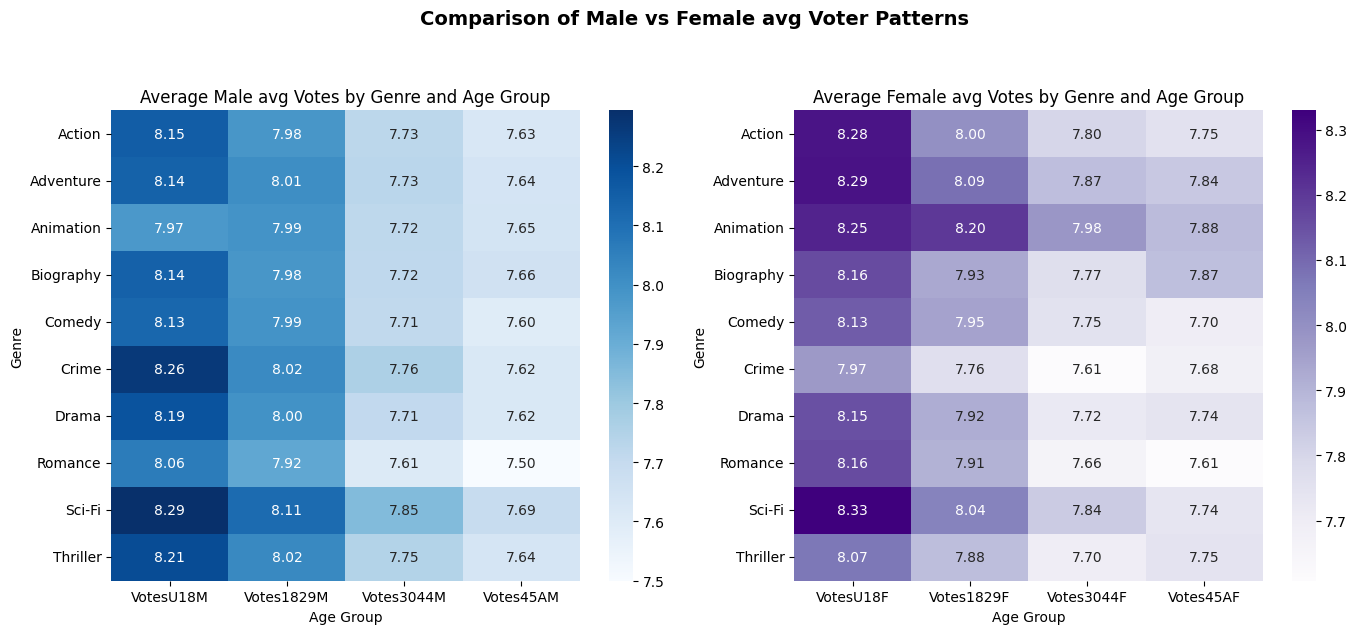

In [49]:
# 2nd set of heat maps for Votes-related columns

male_avg_vote_cols = ['VotesU18M', 'Votes1829M', 'Votes3044M', 'Votes45AM']
female_avg_vote_cols = ['VotesU18F', 'Votes1829F', 'Votes3044F', 'Votes45AF']
genre_avg_votes_male = (
    genre_top10.groupby('genre')[male_avg_vote_cols]
    .mean()
    .sort_index()
)

genre_avg_votes_female = (
    genre_top10.groupby('genre')[female_avg_vote_cols]
    .mean()
    .sort_index()
)

plt=plot_side_by_side_heatmaps(
    genre_avg_votes_male,
    genre_avg_votes_female,
    title_left='Average Male avg Votes by Genre and Age Group',
    title_right='Average Female avg Votes by Genre and Age Group',
    xlabel_left='Age Group',
    xlabel_right='Age Group',
    ylabel_left='Genre',
    ylabel_right='Genre',
    cmap_left='Blues',
    cmap_right='Purples',
    fmt='.2f',
    suptitle='Comparison of Male vs Female avg Voter Patterns'
)
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:
- Inference 2:
- Inference 3:

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [50]:
# Creating IFUS column
movie_df2['IFUS']=movie_df2.apply(lambda row:'USA'if row['Country']=='USA'else 'non-USA' ,axis=1)

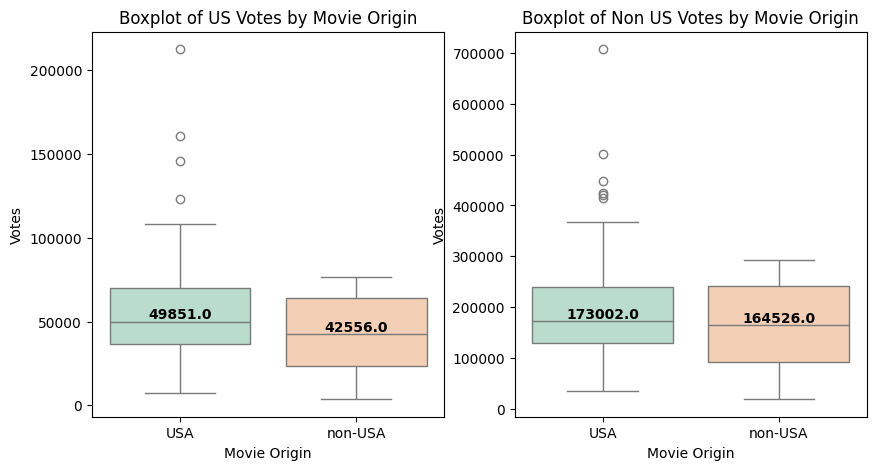

In [76]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
plt=plot_boxplot_with_medians(df=movie_df2,x='IFUS',
                              y='CVotesUS',
                              title='Boxplot of US Votes by Movie Origin',
                              xlabel='Movie Origin',ylabel='Votes',
                              rx='IFUS',ry='CVotesnUS',
                              right_title='Boxplot of Non US Votes by Movie Origin',
                              x_right_label='Movie Origin',y_right_label='Votes'

                              )
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1:
- Inference 2:

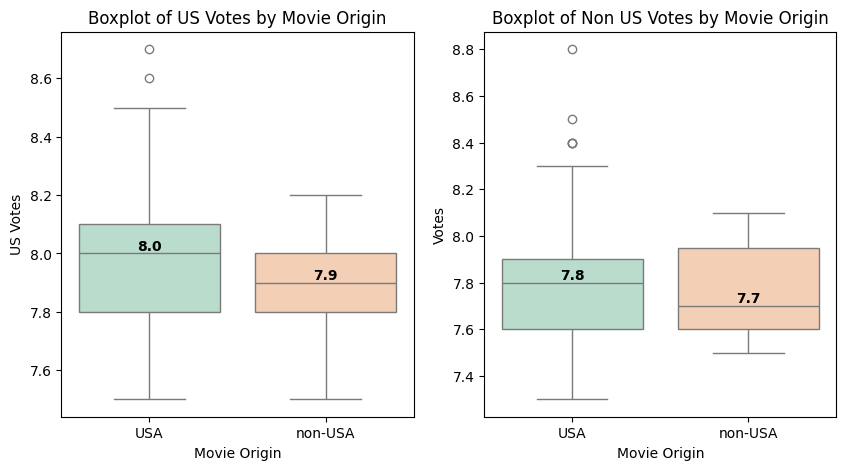

In [75]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
plt=plot_boxplot_with_medians(df=movie_df2,x='IFUS',y='VotesUS',
                              title='Boxplot of US Votes by Movie Origin',
                              xlabel='Movie Origin',ylabel='US Votes',
                              rx='IFUS',ry='VotesnUS',
                              right_title='Boxplot of Non US Votes by Movie Origin',
                              x_right_label='Movie Origin',y_right_label='Votes'
                              )
plt.show()


**`Inferences:`** Write your two inferences/observations below:
- Inference 1:
- Inference 2:

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres.

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [53]:
# Sorting by CVotes1000
genre_top10_sorted=genre_top10.sort_values('CVotes1000',ascending=False)


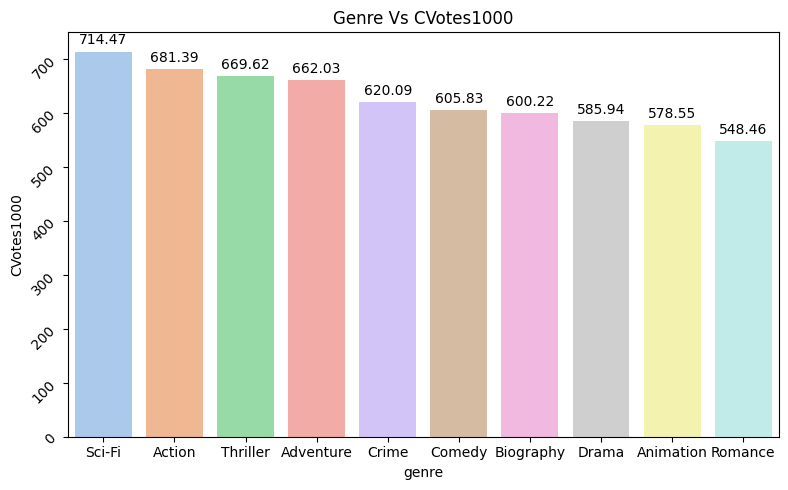

In [54]:
# Bar plot
plt=plot_barplot(df=genre_top10_sorted,x="genre",y='CVotes1000',title='Genre Vs CVotes1000',xlabel='genre',ylabel='CVotes1000')
plt.show()

**`Inferences:`** Write your inferences/observations here.

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.